In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_84526/1521273946.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#Datei einlesen und anzeigen:
df = pd.read_csv("/Users/carareusch/Desktop/TechsLabTeam2/TechsLabTeam2/Data/Raw/Hotel/hotel_bookings.csv", encoding="ISO-8859-1", sep=',')

df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [30]:
#Tage des Aufenthalts addieren und cancellations rausrechnen:
df["duration_of_stay"]= df["stays_in_weekend_nights"] + df["stays_in_week_nights"]
df= df[df["duration_of_stay"]!=0]

In [17]:
#Spalten nach Hotels gruppieren:
hotel_grp=df.groupby(["hotel"])

#Aufenthalt für das Resort Hotel herausfinden:
stay_resort = hotel_grp.get_group("Resort Hotel")["duration_of_stay"].value_counts().to_dict()

sorted_stay_resort = dict(sorted(stay_resort.items()))

print(sorted_stay_resort)

{1: 7748, 2: 6217, 3: 5695, 4: 4826, 5: 2787, 6: 1798, 7: 6596, 8: 776, 9: 628, 10: 940, 11: 314, 12: 158, 13: 100, 14: 816, 15: 33, 16: 24, 17: 12, 18: 28, 19: 10, 20: 1, 21: 61, 22: 7, 23: 6, 25: 35, 26: 3, 27: 1, 28: 31, 29: 3, 30: 5, 33: 1, 35: 5, 38: 1, 42: 4, 45: 1, 46: 1, 56: 2, 60: 1, 69: 1}


/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_84526/4219366472.py:5: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  stay_resort = hotel_grp.get_group("Resort Hotel")["duration_of_stay"].value_counts().to_dict()


In [18]:
#Aufenthalt für das City Hotel herausfinden:
stay_city = hotel_grp.get_group("City Hotel")["duration_of_stay"].value_counts().to_dict()

sorted_stay_city = dict(sorted(stay_city.items()))

print(sorted_stay_city)

{1: 13272, 2: 21426, 3: 21381, 4: 12557, 5: 4997, 6: 2059, 7: 2059, 8: 385, 9: 213, 10: 199, 11: 82, 12: 65, 13: 42, 14: 100, 15: 42, 16: 16, 17: 8, 18: 7, 19: 12, 20: 13, 21: 10, 22: 7, 23: 2, 24: 6, 25: 2, 26: 3, 27: 4, 28: 4, 29: 11, 30: 8, 33: 2, 34: 1, 43: 1, 48: 1, 49: 1, 57: 1}


/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_84526/2716445311.py:2: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  stay_city = hotel_grp.get_group("City Hotel")["duration_of_stay"].value_counts().to_dict()


In [57]:
# Gruppen für verschiedene Aufenthaltsdauern bilden: 
def group_duration(duration):
    if duration <= 10:
        return str(duration)
    elif duration in range(11, 16):
        return "11-15"
    elif duration in range(16, 21):
        return "16-20"
    elif duration in range(21, 31):
        return "21-30"
    elif duration in range(31, 41):
        return "31-40"
    elif duration in range(41, 61):
        return "41-60"
    else:
        return "60+":
    
#Neue Spalte mit den Gruppierten Werten erstellen:
df['grouped_duration'] = df['duration_of_stay'].apply(group_duration)

#Aufenthaltsdauer für das City Hotel nochmal neu ausgezählt mit den Grupperiungen:
stay_city_counts = hotel_grp.get_group("City Hotel")["grouped_duration"].value_counts().to_dict()

# Die einzelnen Tage von 1 bis 10 sortieren:
single_day_sorted = dict(sorted((int(key), value) for key, value in stay_city_counts.items() if key.isdigit()))

# Gruppieren der Tage in der gewünschten Reihenfolge für das City Hotel:
group_order = ['11-15', '16-20', '21-30', '31-40', '41-60', '60+']
grouped_day_sorted = {key: stay_city_counts[key] for key in group_order if key in stay_city_counts}

# Verbinden der sortierten Ergebnisse
sorted_stay_city_grouped = {**single_day_sorted, **grouped_day_sorted}

#print(stay_city_counts)
print(sorted_stay_city_grouped)


{1: 13272, 2: 21426, 3: 21381, 4: 12557, 5: 4997, 6: 2059, 7: 2059, 8: 385, 9: 213, 10: 199, '11-15': 331, '16-20': 56, '21-30': 57, '31-40': 3, '41-60': 4}


/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_84526/688435485.py:22: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  stay_city_counts = hotel_grp.get_group("City Hotel")["grouped_duration"].value_counts().to_dict()


In [58]:
# Selber Code um das Resort Hotel zu gruppieren und dann nochmal neu auszuzählen:
stay_resort_counts = hotel_grp.get_group("Resort Hotel")["grouped_duration"].value_counts().to_dict()

# Die einzelnen Tage von 1 bis 10 sortieren:
single_day_sorted = dict(sorted((int(key), value) for key, value in stay_resort_counts.items() if key.isdigit()))

# Gruppieren der Tage in der gewünschten Reihenfolge für das City Hotel:
group_order = ['11-15', '16-20', '21-30', '31-40', '41-60', '60+']
grouped_day_sorted = {key: stay_resort_counts[key] for key in group_order if key in stay_resort_counts}

# Verbinden der sortierten Ergebnisse
sorted_stay_resort_grouped = {**single_day_sorted, **grouped_day_sorted}

print(sorted_stay_resort_grouped)



{1: 7748, 2: 6217, 3: 5695, 4: 4826, 5: 2787, 6: 1798, 7: 6596, 8: 776, 9: 628, 10: 940, '11-15': 1421, '16-20': 75, '21-30': 152, '31-40': 7, '41-60': 9, '60+': 1}


/var/folders/pl/4hv3k75x16l4274btx10gcsc0000gn/T/ipykernel_84526/3168740968.py:2: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  stay_resort_counts = hotel_grp.get_group("Resort Hotel")["grouped_duration"].value_counts().to_dict()


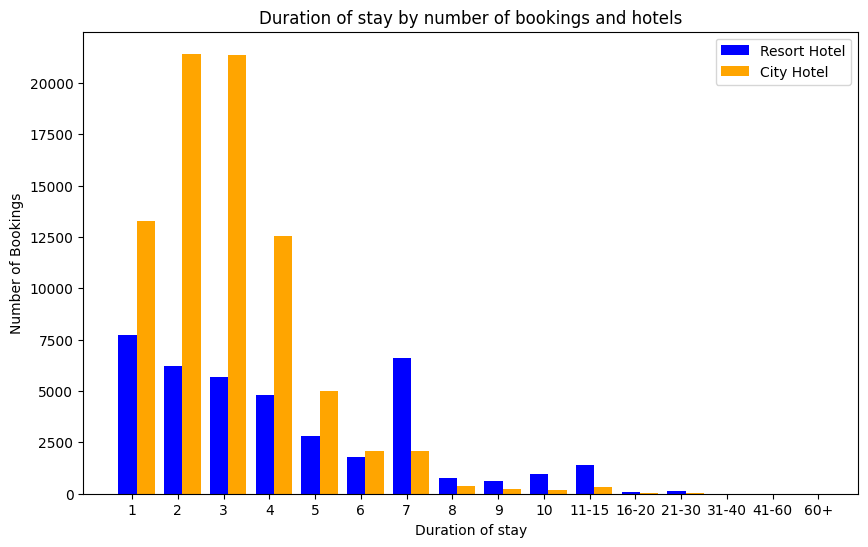

In [91]:
# Die sortierten Werte für Resort Hotel und City Hotel extrahieren
x_resort = sorted_stay_resort_grouped.keys()
y_resort = sorted_stay_resort_grouped.values()
x_city = sorted_stay_city_grouped.keys()
y_city = sorted_stay_city_grouped.values()

# Größe der Abbildung festlegen
plt.figure(figsize=(10, 6))  # Ändere die Zahlen entsprechend deiner Präferenz für Breite und Höhe


# Säulendiagramm erstellen
plt.bar(x_resort_positions,y_resort, color='blue', width=0.4, label='Resort Hotel')
plt.bar(x_city_positions,y_city, color='orange', width=0.4, label='City Hotel')

# Beschriftungen hinzufügen
plt.xlabel('Duration of stay')
plt.ylabel('Number of Bookings')
plt.title('Duration of stay by number of bookings and hotels')
#plt.xticks([pos + 0.2 for pos in range(len(x_resort) + len(x_city))], list(x_resort) + list(x_city))

# Anpassung der x-Achsenbeschriftungen
x_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11-15', '16-20', '21-30', '31-40', '41-60', '60+']
plt.xticks([pos + 0.1 for pos in range(len(x_labels))], x_labels)

# Legende anzeigen
plt.legend()

# Diagramm anzeigen
plt.show()